<a href="https://colab.research.google.com/github/MariaSparrow/HSE_CS/blob/main/HW_cs_march_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 3 Построение заявочной скоринговой модели
**Общая информация:**
- ⚡Дата выдачи: 14 марта 2023
- ⏰ Мягкий дедлайн 23:59MSK 27.03.2023
- ⏰ Жесткий дедлайн 23:59MSK 30.03.2023
- ✍ работы должны быть высланы на почту maria.vorobyova.ser@gmail.com с темой HSE_CS_[направление]_ФИО, например HSE_CS_ПАД_ИВАНОВ_ИВАН_ИВАНОВИЧ

**Оценивание и штрафы:**

Максимальный балл за работу — 10 баллов. За каждый день просрочки снимается 1 балл. После жесткого дедлайна сдача невозможна. 

Задание должно быть выполнено самостоятельно, «похожие» решения будут рассмотрены как "плагиат" и все похожие работы будут оценены баллом 0.

_Оценка будет снижена, если_ 
- нет комментариев 
- код написан плохо, непонятно
- сделаны неверные выводы

**Что нужно сделать?**

Необходимо построить модель, оценивающую вероятность дефолта клиента на стадии заведения кредитной заявки. Идти нужно строго по ноутбуку и выполнять задания каждого блока.

Перед началом выполнения работы необходимо скачать 2 датасета:
 - Данные с одобренными кредитными заявками [датасет](https://drive.google.com/file/d/1YUEMYCmvLs786AyIUV4l4NZg6k4Sb1cj/view?usp=share_link)
 - Данные с отказанными кредитными заявками [датасет](https://drive.google.com/file/d/1Q1YS4HKJVkTkIRTQsxSzutuKiM5mxUqx/view?usp=share_link)

Описание датасета:

1. target - целевая переменная (1- клиент достиг просрочку 90 дней в первый год кредита, 0 - иначе)
2. INCOME_TYPE - тип подтверждения дохода                
3. EDUCATION_  -  образование               
4. CUSTOMER_CATEGORY_  - категория клиента         
5. income   - доход клиента                  
6. DEPENDANT_NUMBER   - количество иждевенцев         
7. IS_EMPL    - это сотрудник банка                  
8. COUNT_ACTIVE_CREDIT_NO_CC  - количество октрытых кредитов без учета кредитных карт
9. CNT_MNTH_FROM_LAST_PMNT    - сколько месяцев прошло с момента последнего платежа по предудущему кредиту
10. age  - возраст клиента                     
11. experience  - стаж клиента               
12. inquiry_14_day   - количество запросов в бюро кредитных историй за последние 14 дней          
13. inquiry_21_day   - количество запросов в бюро кредитных историй за последние 21 день                  
14. count_mnth_act_passport - сколько месяцев прошло с момента выдачи выдачи паспорта     
15. UID  - ID заявки    

Желаем вам удачи!✌

Ссылка на слайды [семинара](https://drive.google.com/file/d/18ox08w_016lopYZYu248Z6HHcYytsvus/view?usp=sharing) 

In [207]:
# import библиотек
import pandas as pd
import numpy as np

# чтобы отобразить больше столбцов и строк
# pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

import warnings
warnings.filterwarnings('error')


# для работы с датами, временем
from datetime import timedelta
import datetime as dt

# для построения графиков
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns

In [208]:
# считать данные
url_accept = 'https://drive.google.com/file/d/1YUEMYCmvLs786AyIUV4l4NZg6k4Sb1cj/view'
url_accept='https://drive.google.com/uc?id=' + url_accept.split('/')[-2]
url_reject = 'https://drive.google.com/file/d/1Q1YS4HKJVkTkIRTQsxSzutuKiM5mxUqx/view'
url_reject='https://drive.google.com/uc?id=' + url_reject.split('/')[-2]
accept = pd.read_csv(url_accept)
reject = pd.read_csv(url_reject)

# Explatory Data Analysis. Максимально - 2 балла

- 0 баллов, если задание не выполнено
- 1 балл, если посчитаны статистики,есть какие-то графики (важно, ПОЛЕЗНЫЕ графики), но не сделаны выводы
- 2 балла, если посчитаны статистики и есть графики (важно, ПОЛЕЗНЫЕ графики) и сделаны ВЫВОДЫ (важно, что выводы правильные)

In [209]:
accept.info()
'''
I wanna see how consistent the data is aka whether I 
can drop the nan values and still get decent amount of data
''' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     32554 non-null  int64  
 1   INCOME_TYPE                32554 non-null  object 
 2   EDUCATION_                 32554 non-null  object 
 3   CUSTOMER_CATEGORY_         13095 non-null  object 
 4   income                     31901 non-null  float64
 5   DEPENDANT_NUMBER           32514 non-null  float64
 6   IS_EMPL                    32554 non-null  int64  
 7   COUNT_ACTIVE_CREDIT_NO_CC  24190 non-null  float64
 8   CNT_MNTH_FROM_LAST_PMNT    22409 non-null  float64
 9   age                        32554 non-null  float64
 10  experience                 32507 non-null  float64
 11  inquiry_14_day             23333 non-null  float64
 12  inquiry_21_day             23333 non-null  float64
 13  count_mnth_act_passport    32554 non-null  flo

'\nI wanna see how consistent the data is aka whether I \ncan drop the nan values and still get decent amount of data\n'

In [210]:
# A more detailed outlook on the features
accept.isna().sum()

target                           0
INCOME_TYPE                      0
EDUCATION_                       0
CUSTOMER_CATEGORY_           19459
income                         653
DEPENDANT_NUMBER                40
IS_EMPL                          0
COUNT_ACTIVE_CREDIT_NO_CC     8364
CNT_MNTH_FROM_LAST_PMNT      10145
age                              0
experience                      47
inquiry_14_day                9221
inquiry_21_day                9221
count_mnth_act_passport          0
UID                              0
dtype: int64

In [211]:
# Now let's see the target value counts
accept['target'].value_counts()

0    31857
1      697
Name: target, dtype: int64

[Text(0.5, 1.0, 'Target variable balance')]

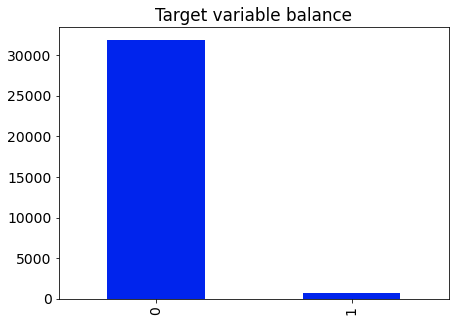

In [212]:
plt.figure(figsize=(7,5));
accept['target'].value_counts().plot(kind='bar').set(title='Target variable balance')
# As can be seen, the target variable is largerly unbalanced

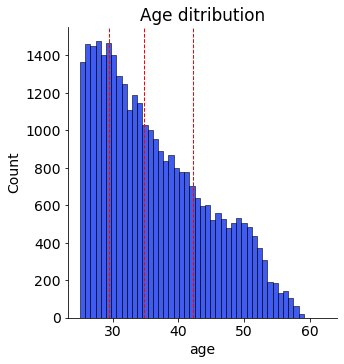

In [213]:
# Now, let's see the age and income distributions
# I also plotted lines displaying the quantiles of this distribution to see howw skewed it is
sns.displot(accept['age'])
plt.title('Age ditribution')
plt.axvline(accept['age'].quantile(0.25), color='red', linestyle='dashed', linewidth=1)
plt.axvline(accept['age'].quantile(0.5), color='red', linestyle='dashed', linewidth=1)
plt.axvline(accept['age'].quantile(0.75), color='red', linestyle='dashed', linewidth=1)

Text(0, 0.5, '')

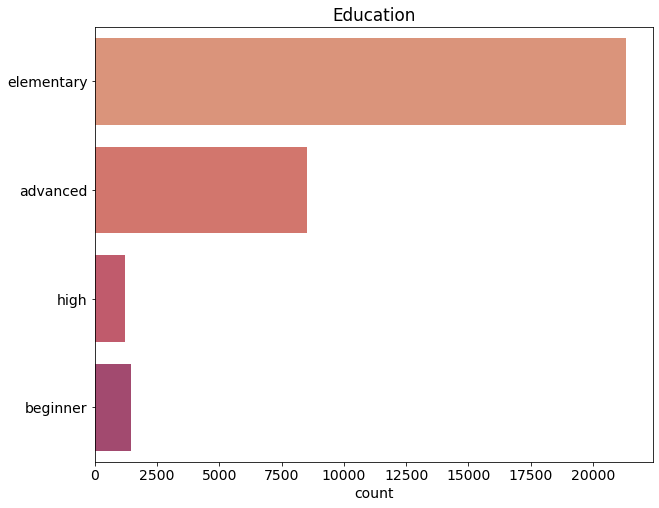

In [214]:
#Now, let's check the Education feature and its relation to target, age and income
sns.set_palette("flare")
fig, ax = plt.subplots()
ax = sns.countplot(y='EDUCATION_', data=accept)
ax.set_title('Education')
ax.set_ylabel('')

0.0    32355
1.0      123
2.0       32
4.0        2
3.0        2
Name: DEPENDANT_NUMBER, dtype: int64


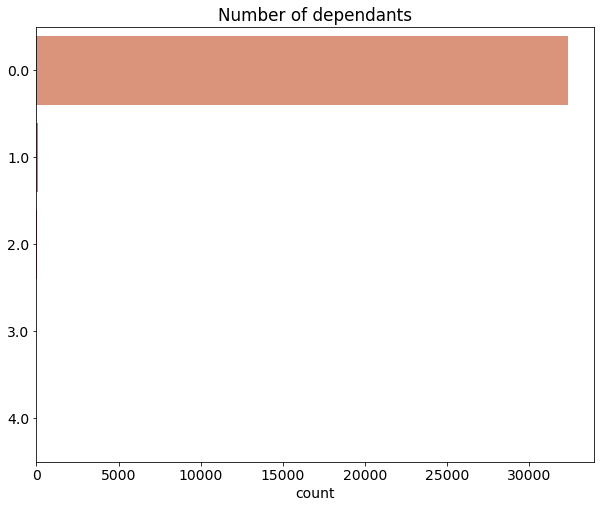

In [215]:
#Now, let's check the number of dependants feature and its relation to target, age and income
sns.set_palette("flare")
fig, ax = plt.subplots()
ax = sns.countplot(y='DEPENDANT_NUMBER', data=accept)
ax.set_title('Number of dependants')
ax.set_ylabel('')
print(accept['DEPENDANT_NUMBER'].value_counts())

0    19853
1    12701
Name: IS_EMPL, dtype: int64


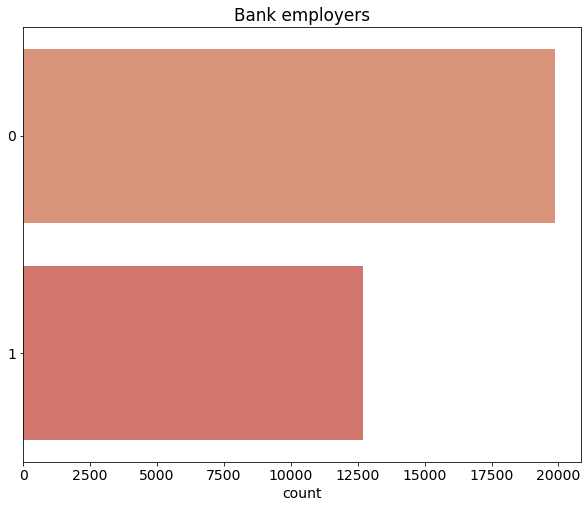

In [216]:
#Now, let's check the 'IS_EMPL' feature and its relation to target, age and income
sns.set_palette("flare")
fig, ax = plt.subplots()
ax = sns.countplot(y='IS_EMPL', data=accept)
ax.set_title('Bank employers')
ax.set_ylabel('')
print(accept['IS_EMPL'].value_counts())

The quantile data for income: 
25% quantile -  26778.0
50% quantile -  41463.0
75% quantile -  70000.0
Outliers -  160000.0


<Figure size 1440x1008 with 0 Axes>

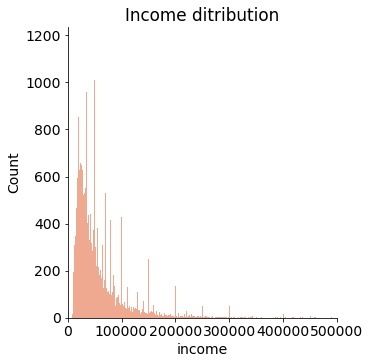

In [217]:
plt.figure(figsize=(20,14))
sns.displot(accept['income'],bins=10000)
plt.title('Income ditribution')
plt.xlim((0,500000)) # for more comprehensible visualisation
print('The quantile data for income: ')
print('25% quantile - ',accept['income'].quantile(0.25))
print('50% quantile - ',accept['income'].quantile(0.5))
print('75% quantile - ',accept['income'].quantile(0.75))
print('Outliers - ',accept['income'].quantile(0.95))

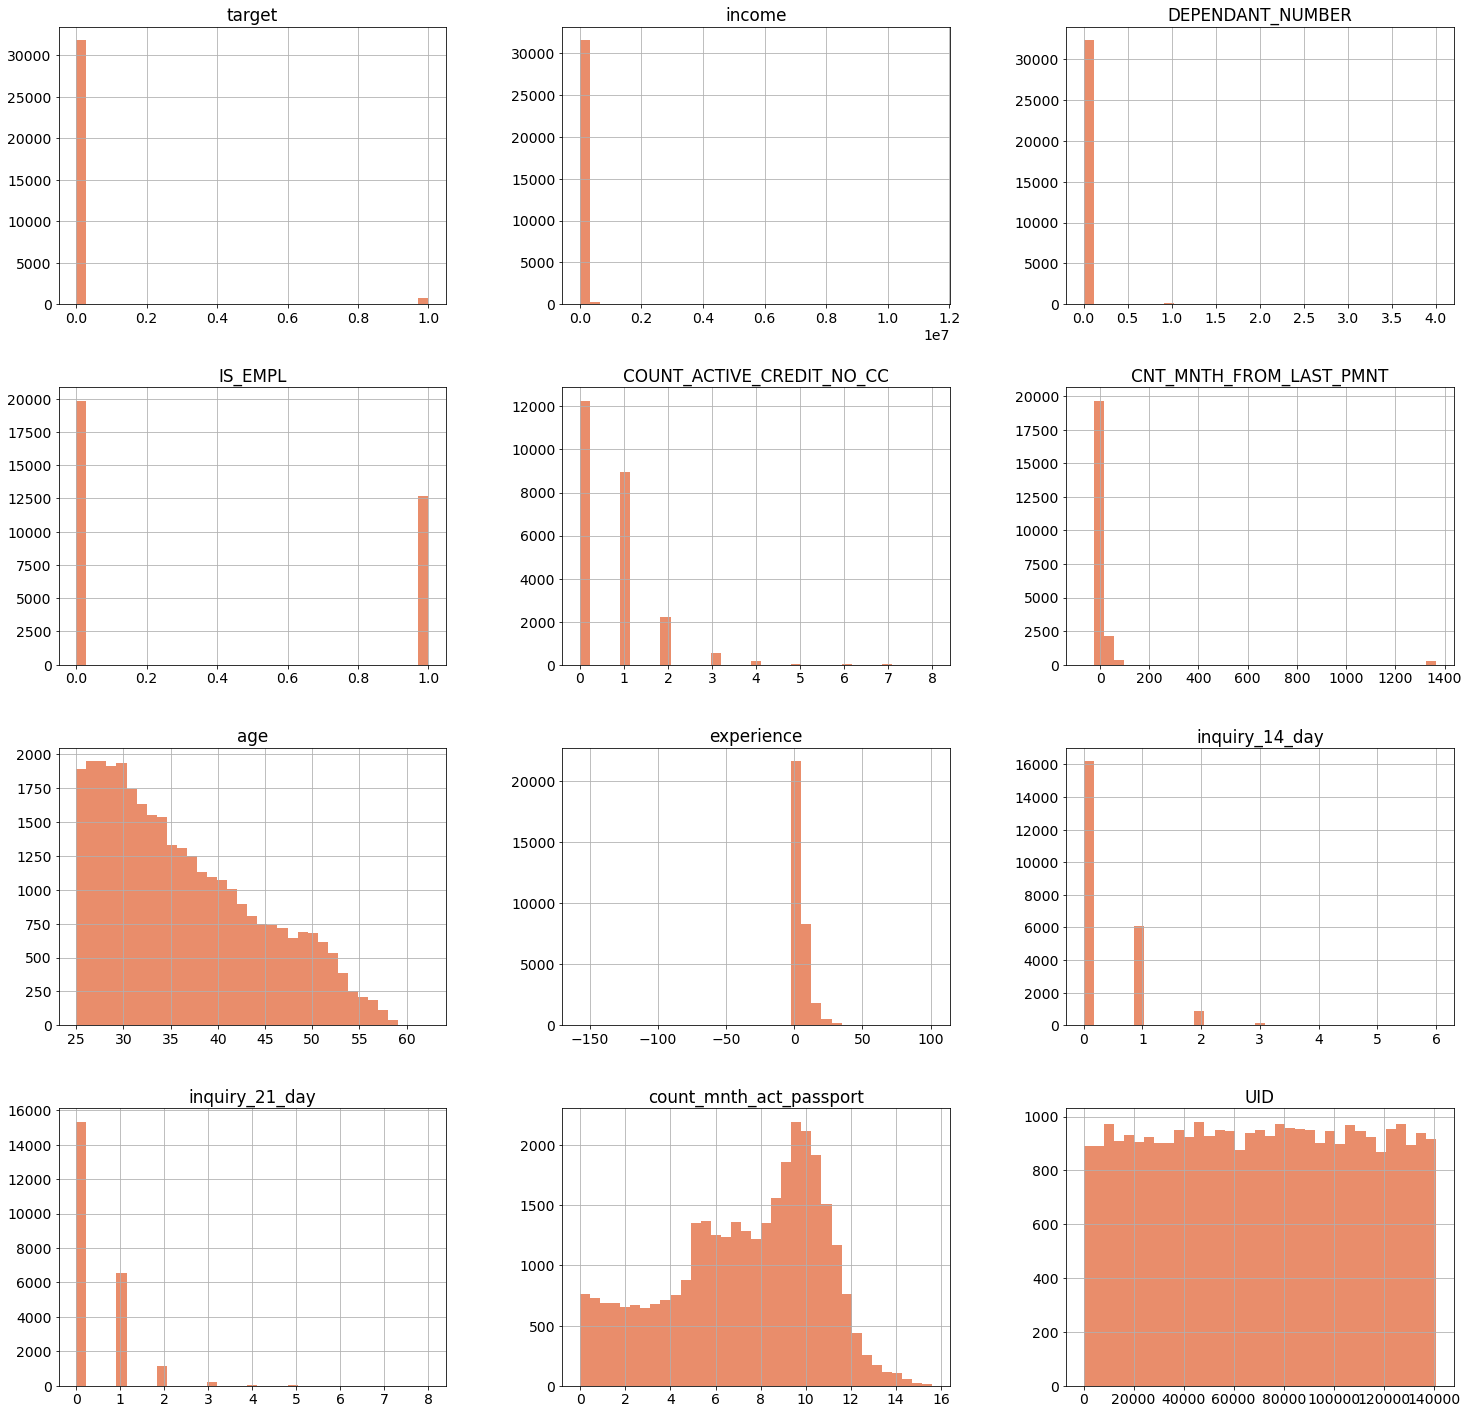

In [218]:
#General visualization for the numeric features
accept.hist(figsize = (25, 25), bins=35);

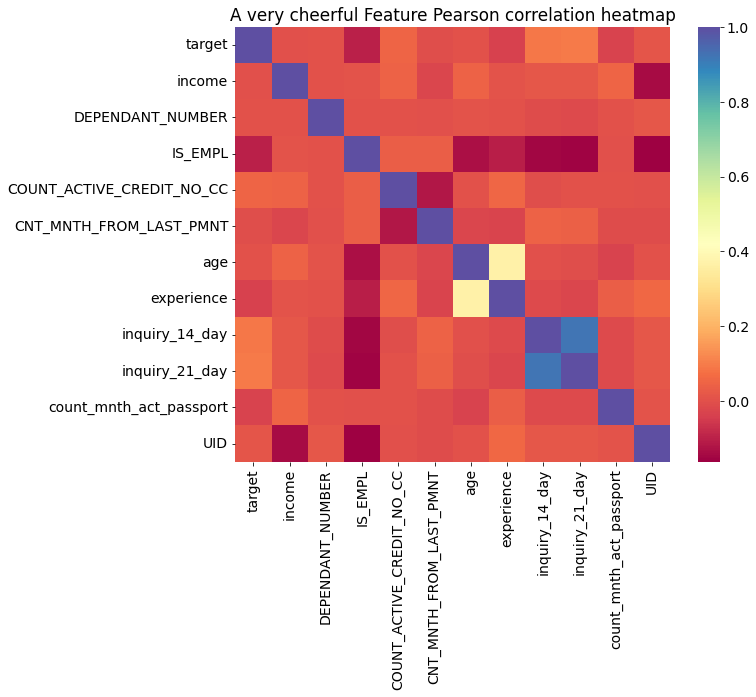

In [219]:
# A more cheerful outlook on Correlation matrix
sns.heatmap(accept.corr(), square=True,cmap='Spectral')
plt.title('A very cheerful Feature Pearson correlation heatmap')
plt.show()

## Conlusions based on the EDA
- It is recommended to drop these features due to a lot of nans: CUSTOMER_CATEGORY_,CNT_MNTH_FROM_LAST_PMNT
- One of the columns inquiry_14_day and inquiry_21_day can be dropped due to high correlation
- The DEPENDANT_NUMBER feature can also be dropped as it contains no information (99% of people have 0 dependants)
- The average client looks as follows (can be useful for business insights ): a man of around 35 years old, earning around 41 thousand roubles, with 60% chance is not a bank worker, has 0 dependants and elementary/advanced education
- The target variable is highly unbalanced and has around 2.1% of 1's
- Obviously. the UID feature should be dropped as well


In [220]:
#Drop features based on EDA
accept.drop('UID',axis=1,inplace=True)
accept.drop('inquiry_21_day',axis=1,inplace=True)
accept.drop('DEPENDANT_NUMBER',axis=1,inplace=True)
accept.drop('CUSTOMER_CATEGORY_',axis=1,inplace=True)
accept.drop('CNT_MNTH_FROM_LAST_PMNT',axis=1,inplace=True)

# Создание дополнительных переменных. Максимально - 1 балл

Будьте креативными, чем больше переменных, тем больше балл! При этом переменные должны быть логичными, нелогичные переменные не принимаются

- 0 баллов, если задание не выполнено
- 0.5 баллов - создана 2 дополнительные переменные 
- 1 балл создано больше 3 переменных 


In [221]:
# YOUR CODE HERE
accept['Temporal_inference'] = accept['experience']**0.5 * accept['age']**0.5
accept['Bank_earners'] =accept['income']*accept['IS_EMPL']
accept['ratio_experience'] = accept['experience']/accept['age']

# Построение модели на одобренных заявках. Максимально - 4 балла
Необхоимо построить логистическую регрессию на WoE переменных. 

Если построена любая другая модель, балл = 0

In [222]:
interval_features = accept.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('IS_EMPL')
interval_features

['income',
 'COUNT_ACTIVE_CREDIT_NO_CC',
 'age',
 'experience',
 'inquiry_14_day',
 'count_mnth_act_passport',
 'Temporal_inference',
 'Bank_earners',
 'ratio_experience']

In [223]:
categorical_features = accept.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['IS_EMPL']
categorical_features

['INCOME_TYPE', 'EDUCATION_', 'IS_EMPL']

Необходимо расчитать WoE преобразование - максимально - 3 балла



Расчет WoE должен быть в 2 этапа:

1 шаг. Fine Classing (1 балл). Разбиение на большое количество бинов(интервалов)
  - обычно интервальные переменные делят по  20, 30 и так далее интервалов
  - для категориальных переменных - одна категория - одна группа
  - далее для каждой группы рассчитываем WoE

2 шаг. Coarse classing (2 балла). Укрупнение интервалов, которые получены на 1-ом шаге. В итоге должно получится не больше 5-10 интервалов. 
  - Обычно объединяют группы с похожими значениями WoE 
  - WoE должен быть монотонным, то есть после вашего объединения результат должен быть интерпретируемым (необходимо продемонстрировать графически, что WoE монотонен )



In [224]:
# преобразование WOE
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [225]:
for feature in interval_features:
    accept[feature + '_bin'] = pd.qcut(accept[feature], 5, duplicates='drop')
    accept[feature + '_bin'] = accept[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in categorical_features:
    accept[feature] = accept[feature].fillna("0-0") 

In [226]:
# разделим на трейн и тест выборку 
from sklearn.model_selection import train_test_split
train, test = train_test_split(accept,
                                test_size=0.3,
                                random_state=17,
                                stratify=accept['target'])

In [227]:
print(train['target'].mean(),test['target'].mean())
scorecard = pd.DataFrame()

0.021415719489182427 0.021398587078939286


In [228]:
for feature in interval_features:
    
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})

    
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])    
    print('feature', feature, '  IV= ',iv)

# As can be seen, the new variables created are really good in terms of IV

feature income   IV=  0.17161382560397528
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.13298741959449406
feature age   IV=  0.012633516002956487
feature experience   IV=  0.5310644707807747
feature inquiry_14_day   IV=  0.10670723852532113
feature count_mnth_act_passport   IV=  0.046276205804925793
feature Temporal_inference   IV=  0.5006486021208564
feature Bank_earners   IV=  0.6154650803944047
feature ratio_experience   IV=  0.5449028409620646


In [229]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

feature INCOME_TYPE   IV=  0.01156523241841005
feature EDUCATION_   IV=  0.020121950916274327
feature IS_EMPL   IV=  0.7773330102889798


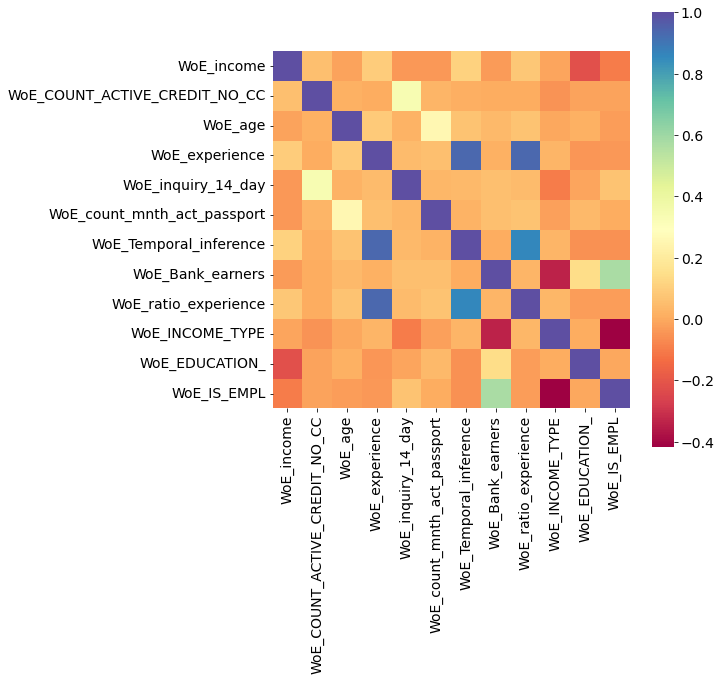

In [230]:
# The WoE correlation  cheerful matrix
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True,cmap='Spectral')
plt.show()

In [231]:
#removing more features based on the WoE correlation
features = test.columns.tolist()
features.remove('target')
features.remove('WoE_INCOME_TYPE')
features.remove('WoE_age')
features.remove('WoE_inquiry_14_day')
features.remove('WoE_experience')
features


['WoE_income',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_count_mnth_act_passport',
 'WoE_Temporal_inference',
 'WoE_Bank_earners',
 'WoE_ratio_experience',
 'WoE_EDUCATION_',
 'WoE_IS_EMPL']

построение и оценка логистической регресии - максимально 1 балл
- построена только логистическая регрессия - 0.3 балла
- сделана оценка модели ( roc auc, f1, и так далее) - 0.3 балла
- построена скоркарта - 0.4 балла

Напомню, что для скоркарты нужны следующие формулы (детали в лекции и семинаре)

Score_i =  (βi × WoE_i + α/n) × Factor + Offset/n, где

- Factor = pdo/ln(2)

- Offset = Target Score — (Factor × ln(Target Odds))

In [232]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
warnings.filterwarnings('ignore', category=DeprecationWarning)
X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']
# Let us use the elastic net in order to prevent overfitting as well as adding max_iter = 40
logreg = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.33,max_iter=40)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.33, max_iter=40,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-3.76045897]


,features,coef
0,WoE_income,-0.957271
1,WoE_COUNT_ACTIVE_CREDIT_NO_CC,-1.036666
2,WoE_count_mnth_act_passport,-0.866503
3,WoE_Temporal_inference,-0.339871
4,WoE_Bank_earners,-0.195458
5,WoE_ratio_experience,-0.653869
6,WoE_EDUCATION_,-1.447257
7,WoE_IS_EMPL,-1.008281


In [234]:
y_pred = logreg.predict(X_test)
print((logreg.score(X_test, y_test)))

0.9794204975939388


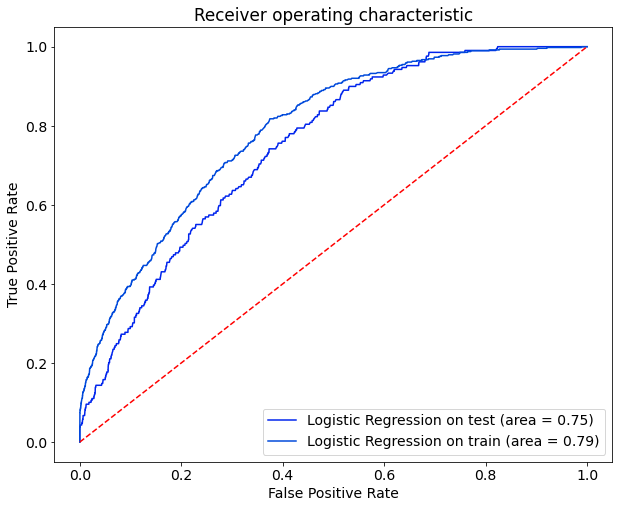

In [235]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set_palette('winter')
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [236]:
# калибровка 
warnings.filterwarnings('ignore', category=FutureWarning)
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')
scorecard
pdo = 20 
Target_Odds = 50 
Target_Score = 600
Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard

28.85390081777927 487.1228762045055


,feature,Value,WoE,coef,score
0,income,0-0,-1.56,-0.96,3.0
1,income,"(35000.0, 50000.0]",-0.14,-0.96,42.0
2,income,"(50000.0, 80000.0]",-0.08,-0.96,44.0
3,income,"(80000.0, 11450378.0]",0.05,-0.96,47.0
4,income,"(24674.0, 35000.0]",0.09,-0.96,48.0
5,income,"(-0.001, 24674.0]",0.59,-0.96,62.0
6,COUNT_ACTIVE_CREDIT_NO_CC,"(1.0, 8.0]",-0.66,-1.04,26.0
7,COUNT_ACTIVE_CREDIT_NO_CC,0-0,-0.29,-1.04,37.0
8,COUNT_ACTIVE_CREDIT_NO_CC,"(-0.001, 1.0]",0.30,-1.04,55.0
9,count_mnth_act_passport,"(-0.0201, 4.178]",-0.29,-0.87,39.0


# Reject Inference (Анализ отклоненных заявок). Максимально -  3 балла
- проведен анализ отклоненых заявок и сравнение с одобренными заявками - 0.2 балла
- проведена разметка отклоненных заявок одним методом (метод можно взять либо из семинара/лекции или любой другой логичный метод, просто всем ставить 1 - нельзя) - 1 балл
- построена общая логистическая регрессия с WoE переменными на одобренных и отказанных заявках - 1 балл
- построена скоркарта - 0.3 балла
- сделан вывод и даны рекомендации какую модель внедрять в продакшен среду 0.3 балла
- даны рекомендации как реализовать мониторинг модели после внедрения в продакшен 0.2 балла

In [239]:
# I'll firstly transform the data with woe, then use my pretrained logreg for predicting the target 
# Then, I'll redo the training process again.
reject.drop('UID',axis=1,inplace=True)
reject.drop('inquiry_21_day',axis=1,inplace=True)
reject.drop('DEPENDANT_NUMBER',axis=1,inplace=True)
reject.drop('CUSTOMER_CATEGORY_',axis=1,inplace=True)
reject.drop('CNT_MNTH_FROM_LAST_PMNT',axis=1,inplace=True)
reject['Temporal_inference'] = accept['experience']**0.5 * accept['age']**0.5
reject['Bank_earners'] =accept['income']*accept['IS_EMPL']
reject['ratio_experience'] = accept['experience']/accept['age']

In [241]:
interval_features = reject.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('IS_EMPL')
interval_features
categorical_features = reject.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['IS_EMPL']
categorical_features

['INCOME_TYPE', 'EDUCATION_', 'IS_EMPL']

In [260]:
train =reject



In [261]:
for feature in interval_features:
    reject[feature + '_bin'] = pd.qcut(reject[feature], 5, duplicates='drop')
    reject[feature + '_bin'] = reject[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in categorical_features:
    reject[feature] = reject[feature].fillna("0-0") 

In [262]:
for feature in interval_features:
    
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})   
    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.7773330102889798
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.7773330102889798
feature age   IV=  0.7773330102889798
feature experience   IV=  0.7773330102889798
feature inquiry_14_day   IV=  0.7773330102889798
feature count_mnth_act_passport   IV=  0.7773330102889798
feature Temporal_inference   IV=  0.7773330102889798
feature Bank_earners   IV=  0.7773330102889798
feature ratio_experience   IV=  0.7773330102889798


In [263]:
for feature in categorical_features:
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    print('feature', feature, '  IV= ',iv)

feature INCOME_TYPE   IV=  0.7773330102889798
feature EDUCATION_   IV=  0.7773330102889798
feature IS_EMPL   IV=  0.7773330102889798


In [256]:
features = test.columns.tolist()
features.remove('target')
features.remove('WoE_INCOME_TYPE')
features.remove('WoE_age')
features.remove('WoE_inquiry_14_day')
features.remove('WoE_experience')
features

['WoE_income',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_count_mnth_act_passport',
 'WoE_Temporal_inference',
 'WoE_Bank_earners',
 'WoE_ratio_experience',
 'WoE_EDUCATION_',
 'WoE_IS_EMPL']

In [264]:
logreg.predict(train)

ValueError: Found array with 0 sample(s) (shape=(0, 45)) while a minimum of 1 is required.

In [266]:
reject

,INCOME_TYPE,EDUCATION_,income,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,age,experience,inquiry_14_day,count_mnth_act_passport,Temporal_inference,Bank_earners,ratio_experience,income_bin,COUNT_ACTIVE_CREDIT_NO_CC_bin,age_bin,experience_bin,inquiry_14_day_bin,count_mnth_act_passport_bin,Temporal_inference_bin,Bank_earners_bin,ratio_experience_bin
0,2NDFL,elementary,26106.0,0,0.0,24.353193,3.284153,1.0,4.268261,10.381916,0.0,0.042152,"(25452.8, 33058.8]","(-0.001, 1.0]","(24.306, 24.666]","(2.589, 15.271]","(-0.001, 1.0]","(3.956, 4.416]","(8.418, 11.81]","(-0.001, 27728.4]","(0.0246, 0.0616]"
1,2NDFL,elementary,30276.0,0,1.0,23.534494,3.581069,0.0,1.411206,7.570364,119510.0,0.072109,"(25452.8, 33058.8]","(-0.001, 1.0]","(23.425, 23.902]","(2.589, 15.271]","(-0.001, 1.0]","(0.0017399999999999998, 2.936]","(5.309, 8.418]","(63122.0, 1784679.0]","(0.0616, 0.115]"
2,2NDFL,advanced,23147.0,0,0.0,24.580021,0.645774,0.0,4.544405,25.418420,0.0,0.486625,"(19247.4, 25452.8]","(-0.001, 1.0]","(24.306, 24.666]","(0.534, 0.943]","(-0.001, 1.0]","(4.416, 43.099]","(16.086, 59.118]","(-0.001, 27728.4]","(0.192, 2.93]"
3,2NDFL,advanced,33116.0,0,0.0,23.284153,0.901130,0.0,3.183060,7.553219,21611.0,0.051346,"(33058.8, 44000.0]","(-0.001, 1.0]","(0.0017299999999999998, 23.425]","(0.534, 0.943]","(-0.001, 1.0]","(2.936, 3.458]","(5.309, 8.418]","(-0.001, 27728.4]","(0.0246, 0.0616]"
4,2NDFL,elementary,45972.0,0,NaN,24.528535,1.405247,NaN,3.581967,4.593702,146841.0,0.015813,"(44000.0, 434136.0]",0-0,"(24.306, 24.666]","(0.943, 1.555]",0-0,"(3.458, 3.956]","(1.304, 5.309]","(63122.0, 1784679.0]","(-6.1530000000000005, 0.0246]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,24311.0,0,NaN,23.456284,1.188060,NaN,3.401639,17.326826,26931.0,0.173595,"(19247.4, 25452.8]",0-0,"(23.425, 23.902]","(0.943, 1.555]",0-0,"(2.936, 3.458]","(16.086, 59.118]","(-0.001, 27728.4]","(0.115, 0.192]"
10689,OTHER,elementary,21400.0,0,0.0,24.040984,0.994303,0.0,2.739509,10.990300,57460.0,0.168895,"(19247.4, 25452.8]","(-0.001, 1.0]","(23.902, 24.306]","(0.943, 1.555]","(-0.001, 1.0]","(0.0017399999999999998, 2.936]","(8.418, 11.81]","(27728.4, 63122.0]","(0.115, 0.192]"
10690,OTHER,elementary,22532.0,1,1.0,24.442623,0.568531,1.0,4.377049,3.604135,214964.0,0.010818,"(19247.4, 25452.8]","(-0.001, 1.0]","(24.306, 24.666]","(0.534, 0.943]","(-0.001, 1.0]","(3.956, 4.416]","(1.304, 5.309]","(63122.0, 1784679.0]","(-6.1530000000000005, 0.0246]"
10691,OTHER,elementary,21750.0,0,NaN,23.218579,0.742039,NaN,3.002313,10.535499,17491.0,0.146918,"(19247.4, 25452.8]",0-0,"(0.0017299999999999998, 23.425]","(0.534, 0.943]",0-0,"(2.936, 3.458]","(8.418, 11.81]","(-0.001, 27728.4]","(0.115, 0.192]"


_Опционально, для тех , кто добрался до конца ноутбука_ 😊

ваше впечатление от работы. 
Что было сложно? 
Что было интересно?